In [658]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [659]:
Cabdata=pd.read_csv("Cab_Data.csv")

In [660]:
Cabdata

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [661]:
Cabdata.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [662]:
Cabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [663]:
dateTravel = Cabdata['Date of Travel'].to_list()
ourBaseDate = pd.Timestamp('1899-12-29')
dates = [ourBaseDate + pd.DateOffset(date_offset) for date_offset in dateTravel]
Cabdata['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')


In [664]:
#Hangi şirketin belirli bir zaman diliminde maksimum taksi kullanıcısı var?
kopya=Cabdata.drop_duplicates(subset=["Transaction ID"])
top21=kopya.groupby("Company").count()["Transaction ID"]
kopya.groupby("Company").count()

,Transaction ID,Date of Travel,City,KM Travelled,Price Charged,Cost of Trip
Company,,,,,,
Pink Cab,84711,84711,84711,84711,84711,84711
Yellow Cab,274681,274681,274681,274681,274681,274681


In [665]:
City=pd.read_csv("City.csv")

In [666]:
City

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [667]:
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [668]:
City.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [669]:
City["Population"]=[a.replace(",","") for a in City.Population]
City["Users"]=[a.replace(",","") for a in City.Users]

In [670]:
City = City.astype({'Population':'int','Users':'int'})

In [671]:
City.info()
City

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 448.0+ bytes


,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [672]:
CusID=pd.read_csv("Customer_ID.csv")

In [673]:
CusID.info()
CusID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [674]:
CusID.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [675]:
TranID=pd.read_csv("Transaction_ID.csv")

In [676]:
TranID.info()
TranID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [677]:
TranID.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [678]:
#şirketlerin yıla göre cirosu
#şehirlere göre km yapımı ve cirosu eğer kolaysa şirkete göre
#kartlarla ödeme yapanla nakit arasındaki kulanıcalrın cirosu
#hangi yaş aralığı en fazla kulanmış
#kadınlar ile erkeklerin kulanım oranı
#kulanıcı sayısı arttıkca marj artıyormu

In [679]:
Cabdata["Tip"]=Cabdata["Price Charged"]-Cabdata["Cost of Trip"]

In [680]:
Cabdata

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Tip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440
...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-07,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800
359388,10440104,2018-01-03,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020
359389,10440105,2018-01-04,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200
359390,10440106,2018-01-04,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420


In [681]:
plot=Cabdata[["Date of Travel","Company","Price Charged"]]

In [682]:
plot=plot.groupby(["Date of Travel"]).sum("Price Charged")

In [683]:
plot=plot.groupby([pd.Grouper(freq='M')]).sum()["Price Charged"]

In [684]:
plott=plot.reset_index()

In [685]:
plott

,Date of Travel,Price Charged
0,2016-01-31,2303744.78
1,2016-02-29,2744742.31
2,2016-03-31,2883035.41
3,2016-04-30,3089676.80
4,2016-05-31,3329398.45
5,2016-06-30,3473596.34
6,2016-07-31,3691470.51
7,2016-08-31,3646549.90
8,2016-09-30,4795413.29
9,2016-10-31,5082300.75


In [686]:
#Hangi şirketin belirli bir zaman diliminde maksimum taksi kullanıcısı var?
kopya=Cabdata.drop_duplicates(subset=["Transaction ID"])
top21=kopya.groupby("Company").count()["Transaction ID"]
kopya.groupby("Company").count()

,Transaction ID,Date of Travel,City,KM Travelled,Price Charged,Cost of Trip,Tip
Company,,,,,,,
Pink Cab,84711,84711,84711,84711,84711,84711,84711
Yellow Cab,274681,274681,274681,274681,274681,274681,274681


In [687]:
top21

Company
Pink Cab       84711
Yellow Cab    274681
Name: Transaction ID, dtype: int64

<AxesSubplot:title={'center':'Total Transactions'}, xlabel='Company', ylabel='count'>

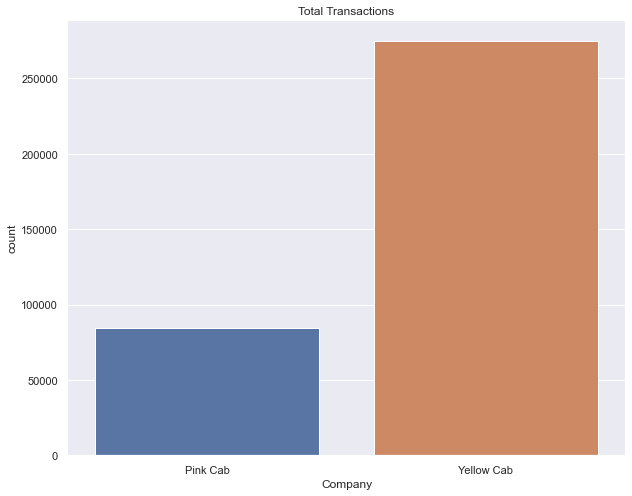

In [688]:
plt.figure(figsize=(10,8))
plt.title("Total Transactions")
sbn.countplot(data=kopya,x="Company")

<AxesSubplot:title={'center':'Total Customer by city'}, xlabel='City', ylabel='count'>

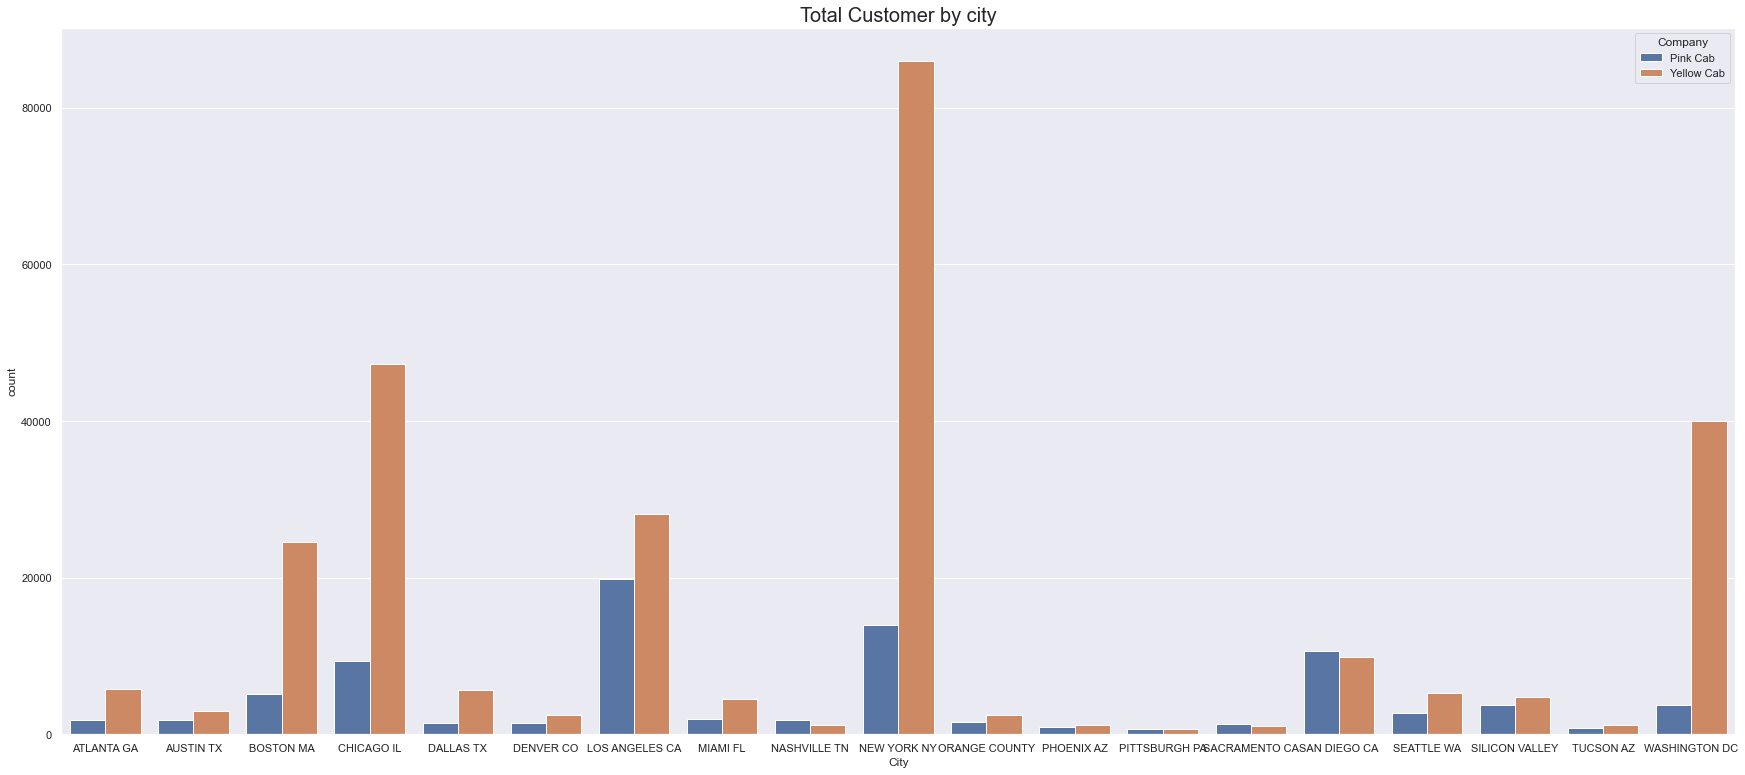

In [719]:
plt.figure(figsize=(30,13))
plt.title("Total Customer by city",fontsize=20)
sbn.countplot(data=kopya,hue="Company",x="City")

In [690]:
MergData= Cabdata.merge(TranID, on= 'Transaction ID').merge(CusID, on ='Customer ID').merge(City, on = 'City')

In [691]:
MergData

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Tip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,Card,Male,27,9237,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-02,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,143.6180,51406,Cash,Female,29,6829,418859,127001
359388,10319775,2018-04-12,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,23.0464,51406,Cash,Female,29,6829,418859,127001
359389,10347676,2018-07-05,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,-5.8540,51406,Card,Female,29,6829,418859,127001
359390,10358624,2018-08-01,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,-6.0900,51406,Cash,Female,29,6829,418859,127001


In [692]:
TotalAge=MergData.groupby("Age").mean()["Price Charged"]
totalage=TotalAge.reset_index()

In [693]:
MergData

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Tip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,Card,Male,27,9237,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-02,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,143.6180,51406,Cash,Female,29,6829,418859,127001
359388,10319775,2018-04-12,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,23.0464,51406,Cash,Female,29,6829,418859,127001
359389,10347676,2018-07-05,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,-5.8540,51406,Card,Female,29,6829,418859,127001
359390,10358624,2018-08-01,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,-6.0900,51406,Cash,Female,29,6829,418859,127001


<AxesSubplot:title={'center':'Average taxi fare by age'}, xlabel='Age', ylabel='Price Charged'>

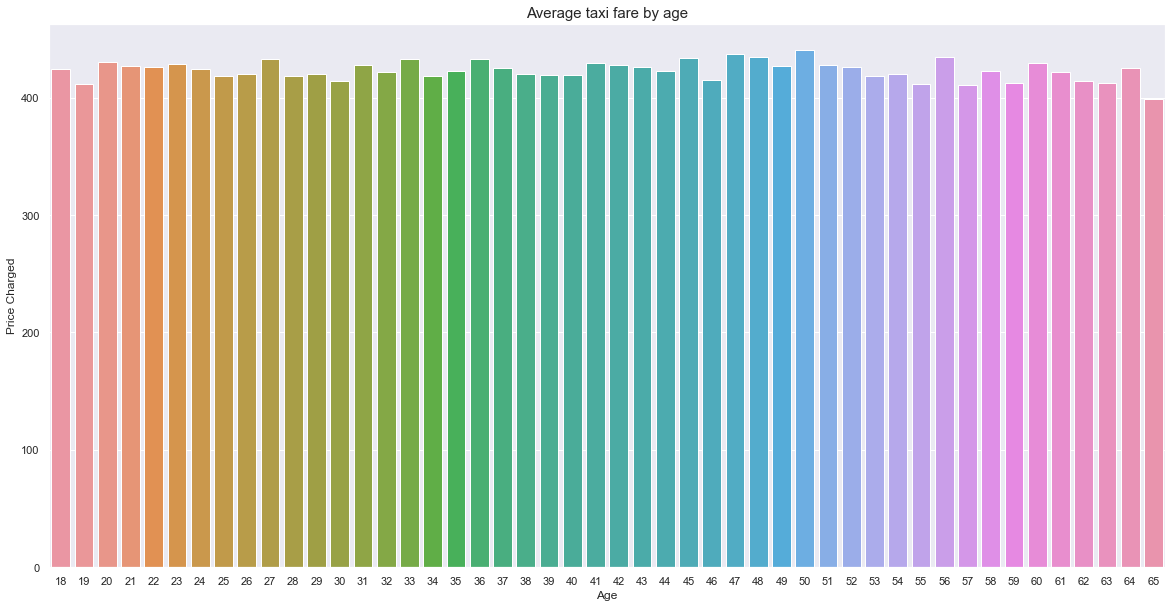

In [714]:
#Average taxi fare by age.
plt.figure(figsize=(20,10))
plt.title("Average taxi fare by age",fontsize=15)
sbn.barplot(data=totalage,x="Age",y="Price Charged")

<AxesSubplot:title={'center':'Average tip fee by age'}, xlabel='Age', ylabel='Tip'>

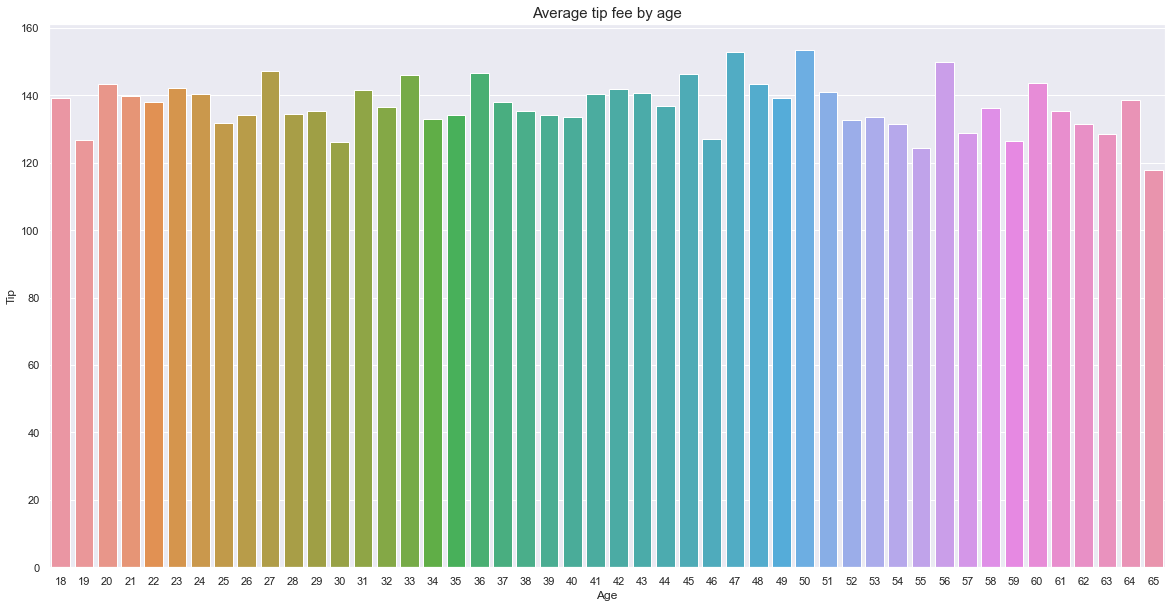

In [713]:
TotaltipAge=MergData.groupby("Age").mean()["Tip"]
totaltipage=TotaltipAge.reset_index()
#Average tip fee by age.

plt.figure(figsize=(20,10))
plt.title("Average tip fee by age",fontsize=15)
sbn.barplot(data=totaltipage,x="Age",y="Tip")

In [698]:
MergDataaa=MergData.groupby(["Company","Payment_Mode"]).sum()["Price Charged"]

In [699]:
MergDataaa=MergDataaa.reset_index()

<AxesSubplot:title={'center':'Money earned by payment method'}, xlabel='Payment_Mode', ylabel='Price Charged'>

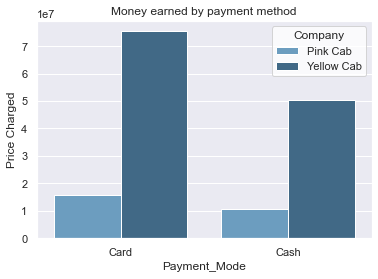

In [700]:
#money earned by payment method.
plt.title("Money earned by payment method")
sbn.set_theme(style="whitegrid")
sbn.barplot(data=MergDataaa,hue="Company",x="Payment_Mode",y="Price Charged",palette="Blues_d")

In [701]:
MergDataaa

,Company,Payment_Mode,Price Charged
0,Pink Cab,Card,15783616.83
1,Pink Cab,Cash,10544634.50
2,Yellow Cab,Card,75459167.70
3,Yellow Cab,Cash,50394719.49


In [702]:
payment2=MergData.groupby(["Company","Payment_Mode"]).count()["Transaction ID"]
payment2=payment2.reset_index()
payment2

,Company,Payment_Mode,Transaction ID
0,Pink Cab,Card,50719
1,Pink Cab,Cash,33992
2,Yellow Cab,Card,164785
3,Yellow Cab,Cash,109896


<AxesSubplot:xlabel='Payment_Mode', ylabel='Transaction ID'>

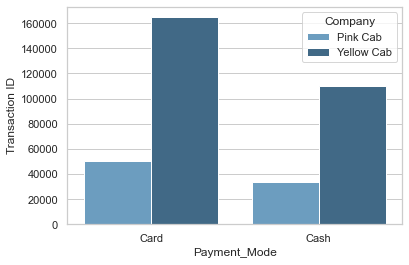

In [703]:
sbn.set_theme(style="whitegrid")
sbn.barplot(data=payment2,x="Payment_Mode",hue="Company",y=payment2["Transaction ID"],palette="Blues_d")

In [704]:
Sum=Cabdata.groupby("Company").sum()

In [705]:
Sum=Sum.reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


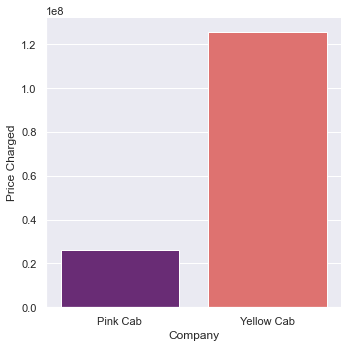

In [706]:

figure1.add_subplot(1,2,1)
sbn.set_theme(style="darkgrid")
sbn.factorplot(data=Sum,x="Company",y="Price Charged",kind="bar",palette="magma")

Text(0.5, 1.0, 'Number of users by company')

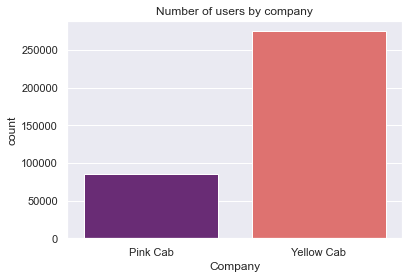

In [707]:
sbn.countplot(data=kopya,x="Company",palette="magma")
plt.title("Number of users by company")

In [708]:
MergeddData=MergData.drop_duplicates(subset=["Transaction ID"])

In [709]:
MergeddData=MergeddData.groupby("Age").count()["Transaction ID"]

In [710]:
MergeddData=MergeddData.reset_index()

(-1.1006029564411817,
 1.1000974319432073,
 -1.1004656822400274,
 1.1000221753447632)

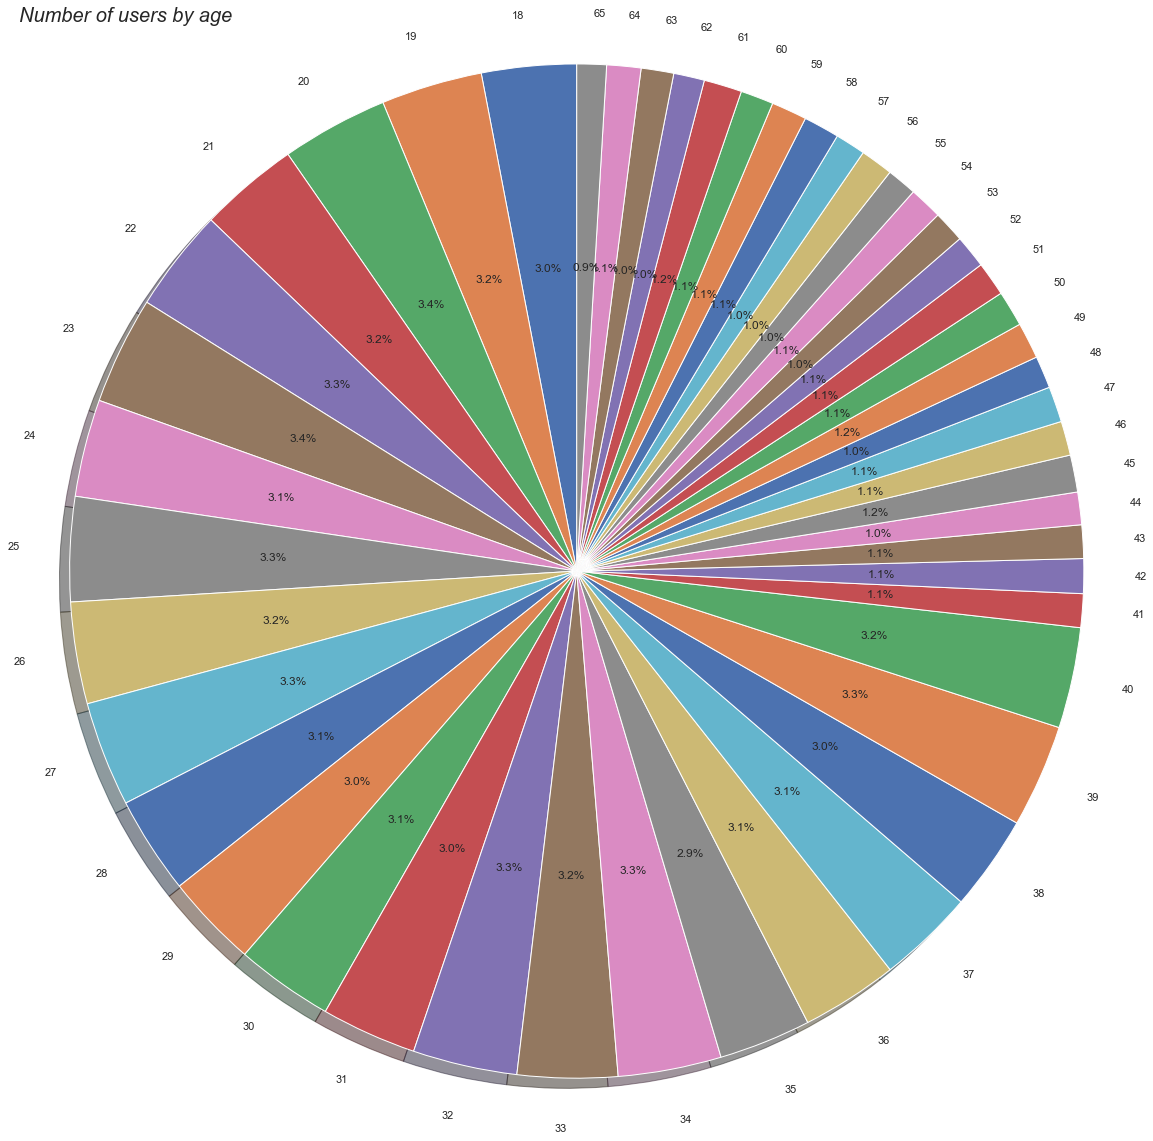

In [711]:
plt.figure(figsize=(20,20))
plt.title("Number of users by age",loc="left",fontstyle='italic',fontsize=20)
plt.pie(MergeddData["Transaction ID"],shadow=True,autopct='%1.1f%%',data=MergeddData,labels="Age",startangle=90)
plt.axis('equal')

(-1.1268144351860332,
 1.1104011169982013,
 -1.1012823995457104,
 1.100061066645034)

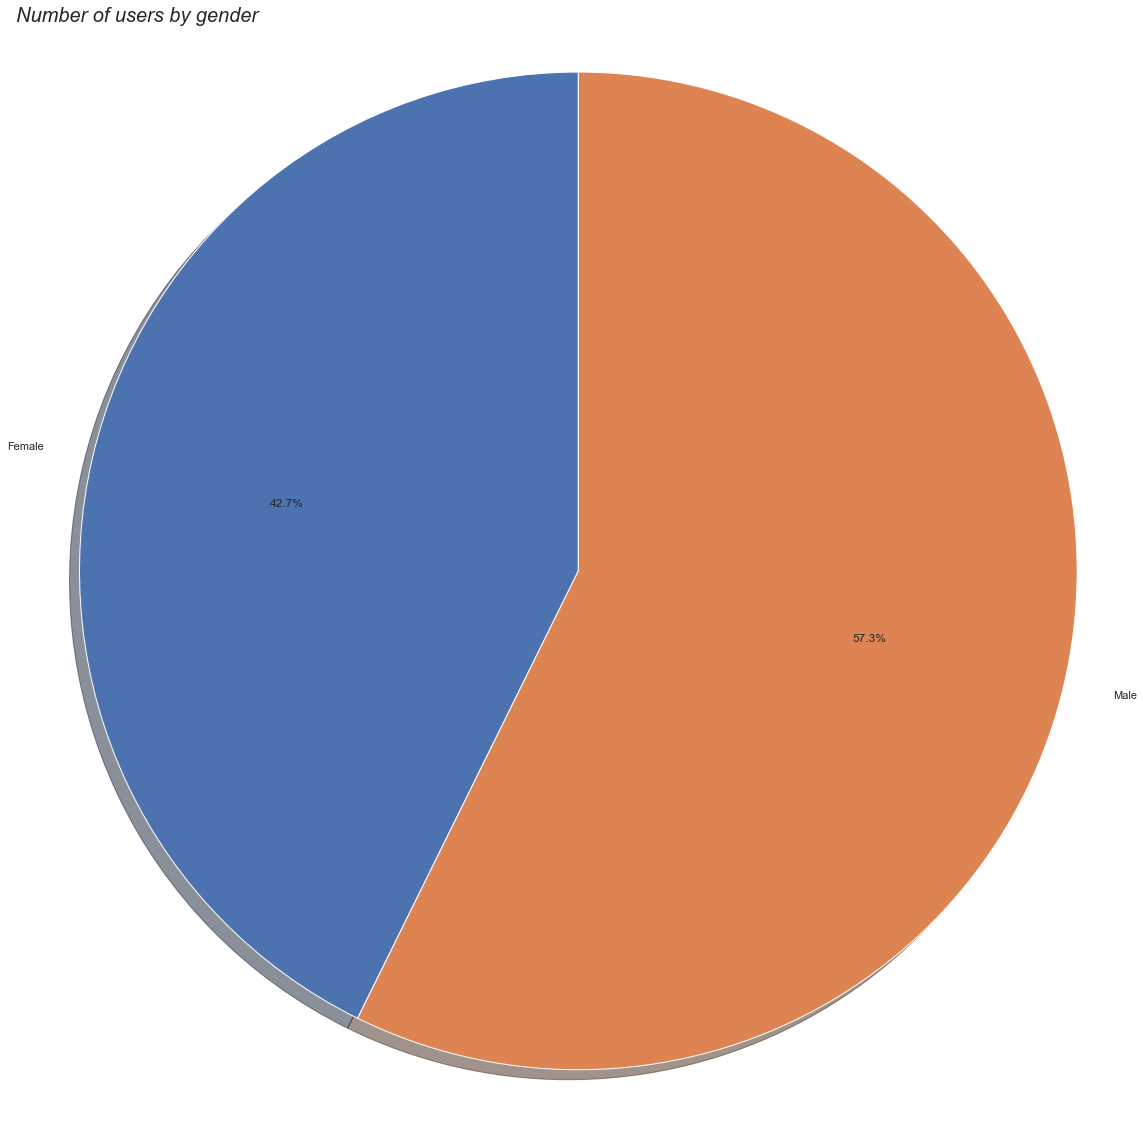

In [712]:
MergeddData=MergData.drop_duplicates(subset=["Transaction ID"])
MergeddData=MergeddData.groupby("Gender").count()["Transaction ID"]
MergeddData=MergeddData.reset_index()
plt.figure(figsize=(20,20))
plt.title("Number of users by gender",loc="left",fontstyle='italic',fontsize=20)
plt.pie(MergeddData["Transaction ID"],shadow=True,autopct='%1.1f%%',data=MergeddData,labels="Gender",startangle=90)
plt.axis('equal')